In [83]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# Read in the CSV
csv = pd.read_csv(r'C:\Users\jtrie\OneDrive\WGU\D212\Churn_Data\churn_clean.csv')

# Use .head() function to make sure dataframe has been created correctly
csv.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


## Data Preparation
<hr>

In [84]:
# Lets create a dataframe using only the variables necessary for our research question
df = csv[['Outage_sec_perweek', 'Tenure']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Outage_sec_perweek  10000 non-null  float64
 1   Tenure              10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [85]:
# Check for missing values
df.isnull().sum()

Outage_sec_perweek    0
Tenure                0
dtype: int64

In [86]:
# Check for duplicated values within the dataset
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


<Axes: ylabel='Outage_sec_perweek'>

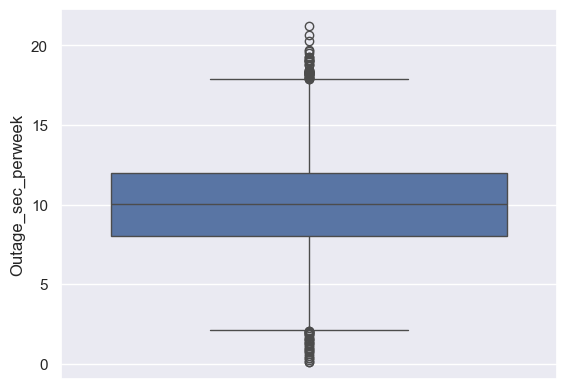

In [87]:
# Check for Outliers
sns.boxplot(df['Outage_sec_perweek'])

0       0.679978
1       0.570331
2       0.252347
3       1.650506
4       0.623156
          ...   
9995    0.196888
9996    1.095915
9997    1.146198
9998    0.695616
9999    0.589028
Name: Outage_sec_perweek, Length: 10000, dtype: float64


<Axes: ylabel='Outage_sec_perweek'>

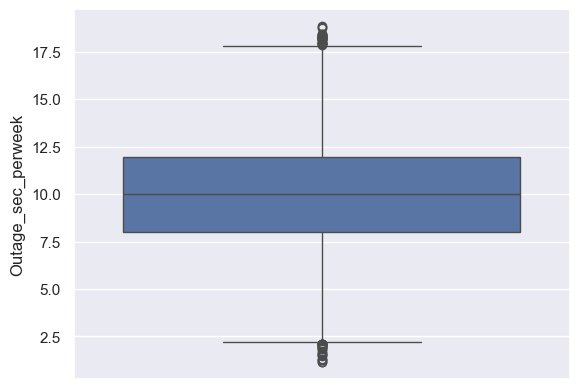

In [88]:
# This will calculate the z-score for the column (GeeksforGeeks, 2021)
z = np.abs(stats.zscore(df['Outage_sec_perweek']))
print(z)

# After finding the z-score, we set our threshold to 3, for 3 standard deviations, and remove any outliers
# outside of 3 standard deviations (GeeksforGeeks, 2021)
threshold_z = 3
 
outlier_indices = np.where(z > threshold_z)[0]
df = df.drop(outlier_indices)

# Boxplot after removing any outliers with more than three standard deviations
sns.boxplot(df['Outage_sec_perweek'])

In [89]:
df.info()
# removal of 28 entries or 0.28%

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Outage_sec_perweek  9972 non-null   float64
 1   Tenure              9972 non-null   float64
dtypes: float64(2)
memory usage: 233.7 KB


<Axes: ylabel='Tenure'>

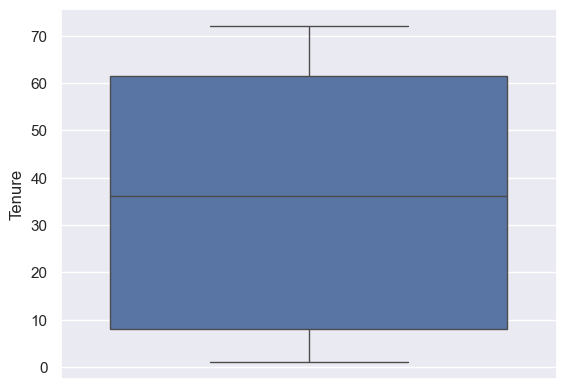

In [90]:
sns.boxplot(df['Tenure'])

## Data Visualization and Preprocessing
<hr>

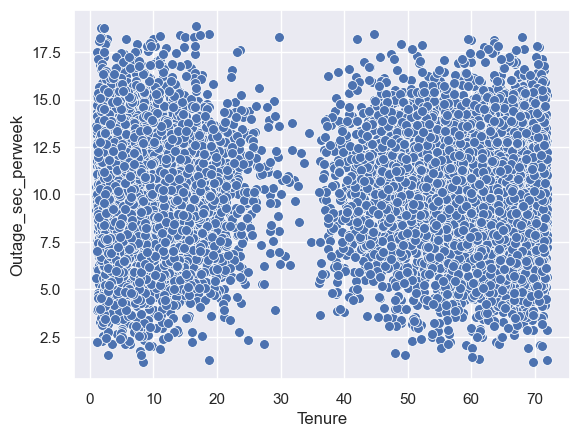

In [91]:
# Visualize the data (Kamara, n.d.)
sns.set_theme()
ax = sns.scatterplot(data = df,
                     x = 'Tenure',
                     y = 'Outage_sec_perweek',
                     s = 50)

In [92]:
# Standardization is crucial for K-means (Kamara, n.d.)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Outage_sec_perweek', 'Tenure']])
scaled_df = pd.DataFrame(scaled_df, columns = ['Outage_sec_perweek', 'Tenure'])

In [93]:
# Export of standardized data
scaled_df.to_csv(r"C:\Users\jtrie\OneDrive\WGU\D212\D212_Prepared_Data_JTR_Task1.csv", index=False, header=True)

In [94]:
# Create our initial K-Means object with 3 clusters (Kamara, n.d.)
k_model = KMeans(n_clusters = 3, n_init = 25, random_state = 300)

k_model.fit(scaled_df)

KMeans(n_clusters=3, n_init=25, random_state=300)

## Model Evaluation
<hr>

In [95]:
evaluate = pd.Series(k_model.labels_).value_counts() # (Kamara, n.d.)
evaluate

1    4717
0    2713
2    2542
Name: count, dtype: int64

In [96]:
centeroid = pd.DataFrame(k_model.cluster_centers_, columns = ['Outage_sec_perweek', 'Tenure']) # (Kamara, n.d.)

centeroid

,Outage_sec_perweek,Tenure
0,0.808676,-0.89044
1,0.006736,0.98982
2,-0.879278,-0.88861


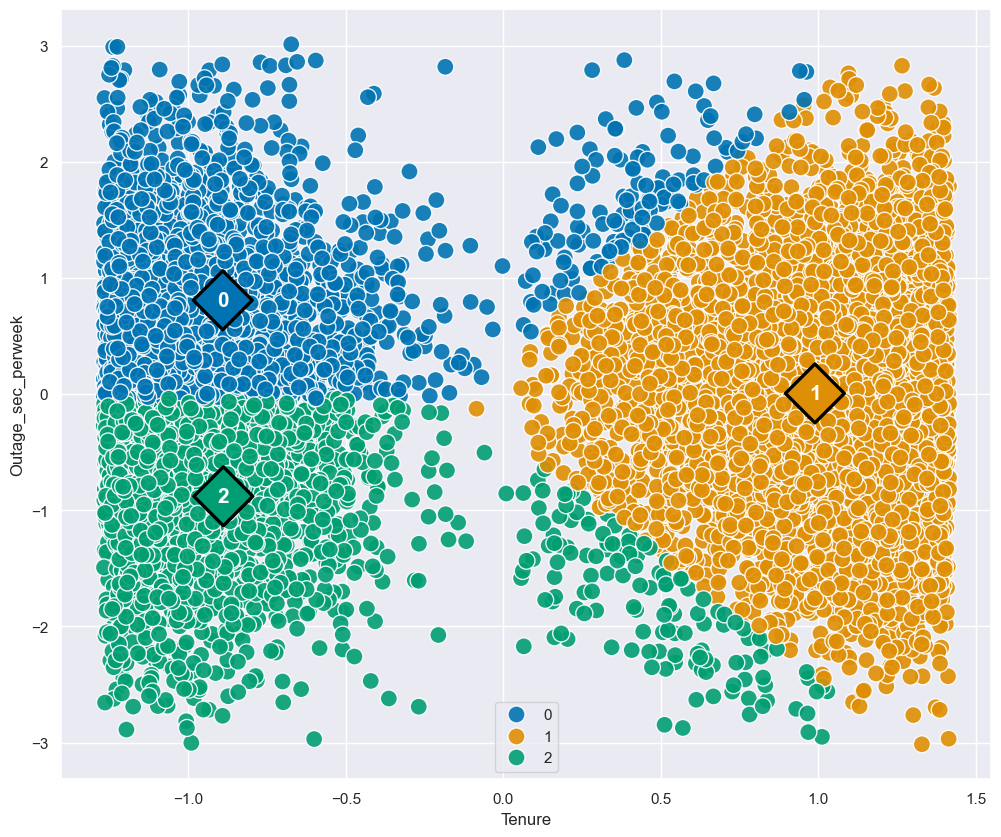

In [97]:
# Plot our model to visualize our groups (Kamara, n.d.)
plt.figure(figsize = (12, 10))

ax = sns.scatterplot(data = scaled_df, 
                     x = 'Tenure',
                     y = 'Outage_sec_perweek',
                     hue = k_model.labels_,
                     palette = 'colorblind',
                     alpha = 0.9,
                     s = 150,
                     legend = True)

ax = sns.scatterplot(data = centeroid, 
                     x = 'Tenure',
                     y = 'Outage_sec_perweek',
                     hue = centeroid.index,
                     palette = 'colorblind',
                     s = 900,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

for i in range(len(centeroid)):
    plt.text(x = centeroid.Tenure[i],
             y = centeroid.Outage_sec_perweek[i],
             s = i,
             horizontalalignment = 'center',
             verticalalignment = 'center',
             size = 15,
             weight = 'bold',
             color = 'white')

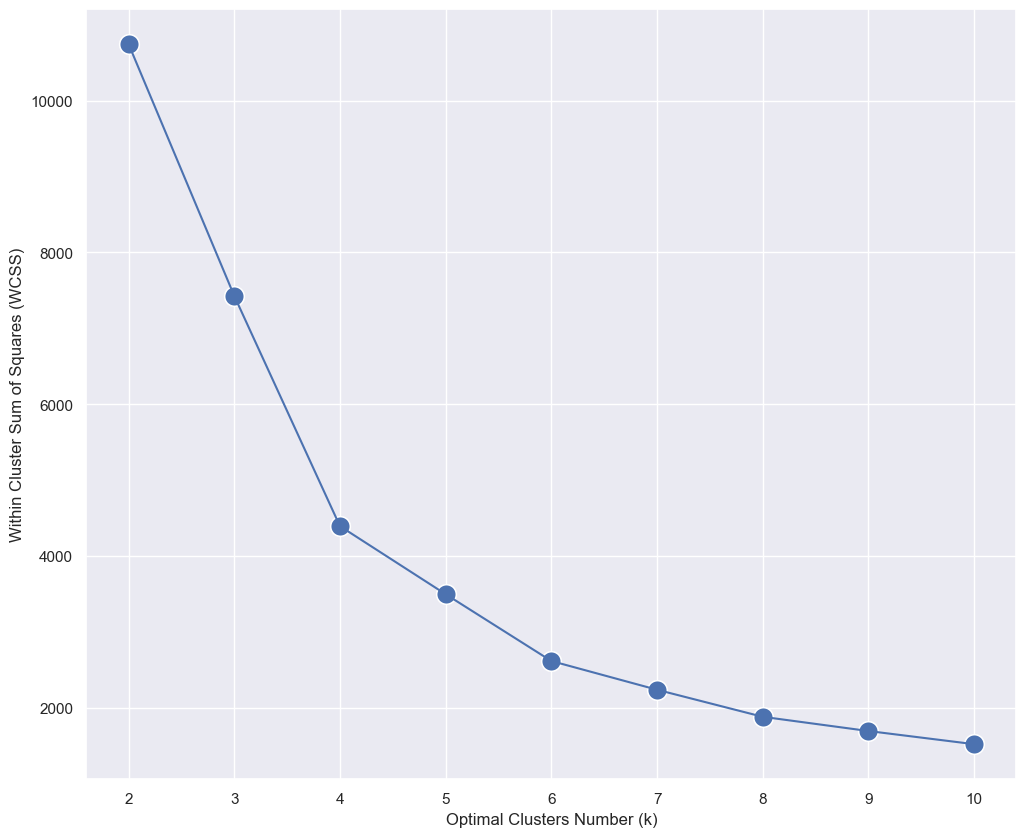

In [98]:
# Use the Elbow Method to see if there is a more optimal K (Kamara, n.d.)
wcss = []
for k in range(2, 11):
    model = KMeans(n_clusters = k, n_init = 50, random_state = 300)
    model.fit(scaled_df)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize = (12, 10))
ax = sns.lineplot(y = wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y = wcss_s, x= wcss_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

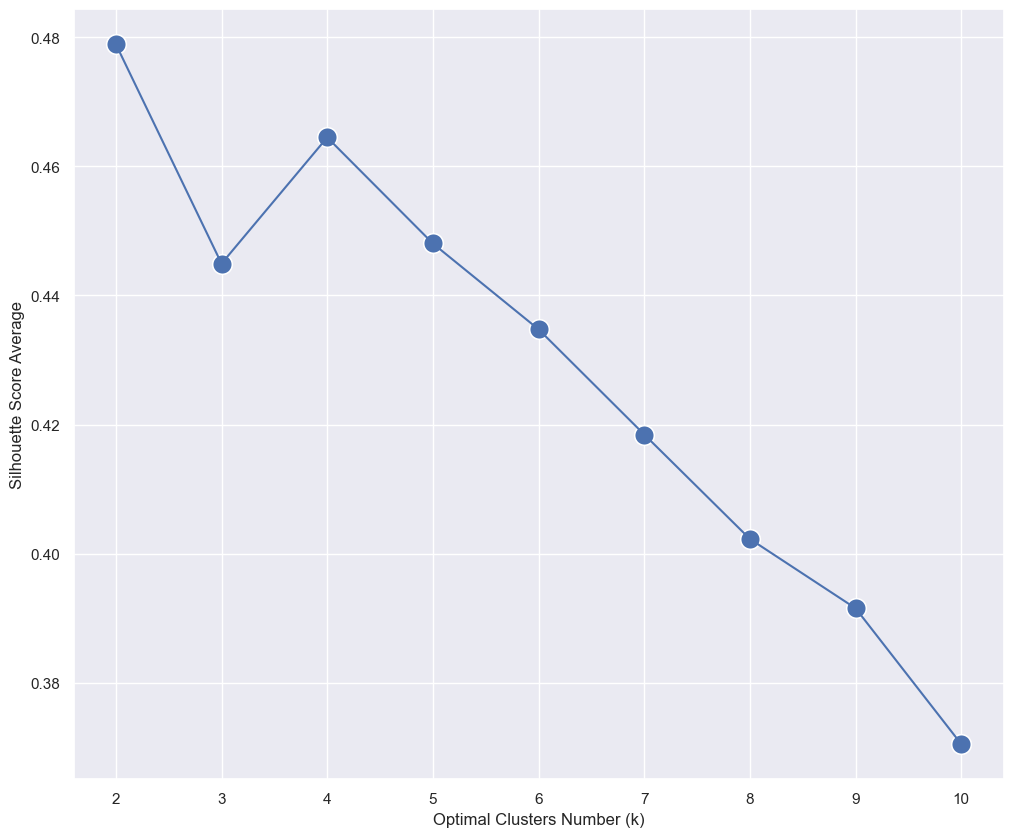

In [99]:
silhouette = [] # (Kamara, n.d.)
for k in range (2, 11):
    model = KMeans(n_clusters = k, n_init = 25, random_state = 300)
    model.fit(scaled_df)
    silhouette.append(silhouette_score(scaled_df, model.labels_))

silhouette_s = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize = (12, 10))
ax = sns.lineplot (y = silhouette_s, x = silhouette_s.index)
ax = sns.scatterplot(y = silhouette_s, x = silhouette_s.index, s = 200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
            ylabel = 'Silhouette Score Average')

## Analyze and Interpret Results
<hr>

In [100]:
# Create a model using our optimal K, 4. 
Final_model = KMeans(n_clusters = 4, n_init = 25, random_state = 300)

Final_model.fit(scaled_df)

KMeans(n_clusters=4, n_init=25, random_state=300)

In [101]:
centeroid = pd.DataFrame(Final_model.cluster_centers_, columns = ['Outage_sec_perweek', 'Tenure'])

centeroid

,Outage_sec_perweek,Tenure
0,-0.800901,0.958566
1,-0.816106,-0.966566
2,0.772755,-0.956662
3,0.802765,0.960558


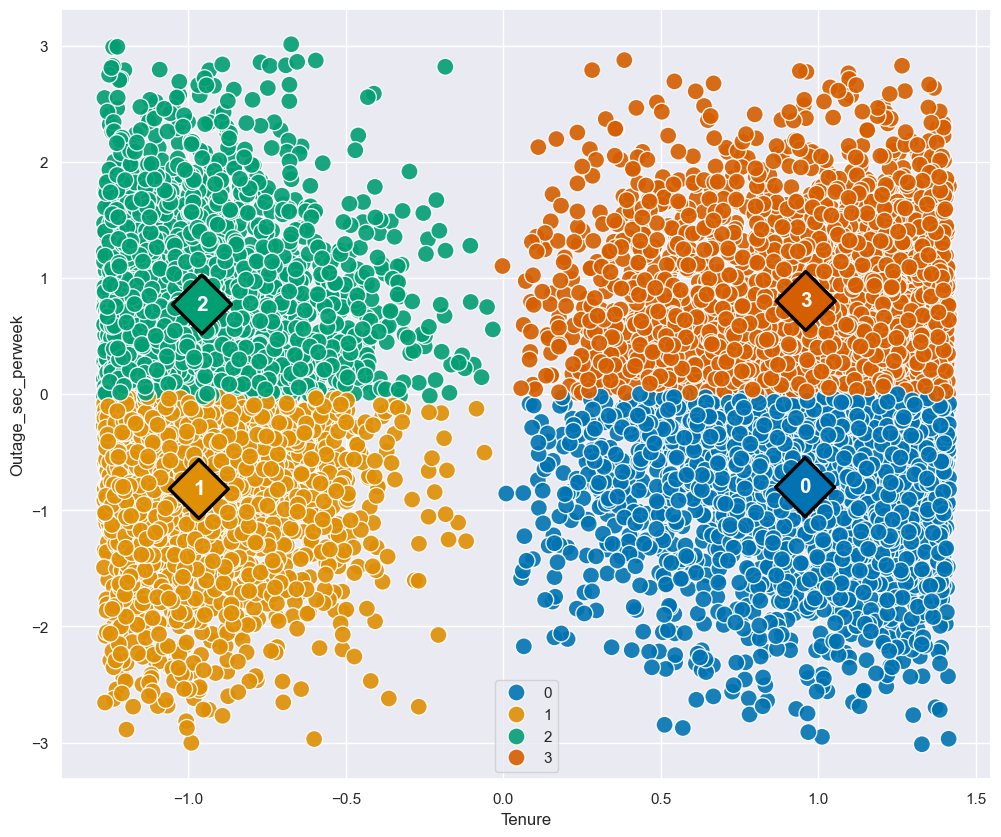

In [102]:
# Plot our model to visualize our groups
plt.figure(figsize = (12, 10))

ax = sns.scatterplot(data = scaled_df, 
                     x = 'Tenure',
                     y = 'Outage_sec_perweek',
                     hue = Final_model.labels_,
                     palette = 'colorblind',
                     alpha = 0.9,
                     s = 150,
                     legend = True)

ax = sns.scatterplot(data = centeroid, 
                     x = 'Tenure',
                     y = 'Outage_sec_perweek',
                     hue = centeroid.index,
                     palette = 'colorblind',
                     s = 900,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

for i in range(len(centeroid)):
    plt.text(x = centeroid.Tenure[i],
             y = centeroid.Outage_sec_perweek[i],
             s = i,
             horizontalalignment = 'center',
             verticalalignment = 'center',
             size = 15,
             weight = 'bold',
             color = 'white')

In [103]:
df['Cluster'] = Final_model.labels_.tolist() # (Kamara, n.d.)
df.head()

,Outage_sec_perweek,Tenure,Cluster
0,7.978323,6.795513,1
1,11.699080,1.156681,2
2,10.752800,15.754144,2
3,14.913540,17.087227,2
4,8.147417,1.670972,1


In [104]:
df.groupby('Cluster').size()

Cluster
0    2490
1    2434
2    2547
3    2501
dtype: int64

In [105]:
df.groupby('Cluster').agg({ # (Kamara, n.d.)
    'Outage_sec_perweek': 'median',
    'Tenure': 'median' })

,Outage_sec_perweek,Tenure
Cluster,,
0,8.010206,61.455650
1,7.977079,7.802636
2,11.922680,8.079294
3,11.940780,61.510350
